In [16]:
import pandas as pd
import numpy as np
import sklearn as skl
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

data = pd.read_csv('adult.data', delimiter = ',')
data.head()

,Age,Workclass,Sector,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
print(data.isnull().any())

Age               False
Workclass         False
Sector            False
Education         False
Education-num     False
Marital-Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital-Gain      False
Capital-Loss      False
Hours-Per-Week    False
Native-Country    False
y                 False
dtype: bool


In [34]:
df_workclass=pd.get_dummies(data['Workclass'])
df_sector=pd.get_dummies(data['Sector'])
df_education=pd.get_dummies(data['Education'])
df_occupation=pd.get_dummies(data['Occupation'])
df_relationship = pd.get_dummies(data['Relationship'])
df_race = pd.get_dummies(data['Sex'])
df_country = pd.get_dummies(data['Native-Country'])

In [43]:
df_final = pd.concat([data[['Age','Capital-Gain','Capital-Loss']],df_workclass,df_education,df_relationship,df_country],axis=1)

In [44]:
data['Sex'].head()

0      Male
1      Male
2      Male
3      Male
4    Female
Name: Sex, dtype: object

In [45]:
def get_y(y):
    if y.find("<=")>-1:
        return 0
    else:
        return 1

In [46]:
# x = data[['Age','Sector','Education-num','Capital-Gain','Capital-Loss','Hours-Per-Week','Marital-Status']]
x= df_final
y = data['y'].apply(lambda y: get_y(y))

In [47]:
def generate_auc(x,y):
    random_state = np.random.RandomState(0)
    x,y = shuffle(x,y,random_state=random_state)
    n_samples, n_features = x.shape
    half = int(n_samples/1.2)
    x_train, x_test = x[:half], x[half:]
    y_train, y_test = y[:half], y[half:]
    
    classifier = linear_model.LogisticRegression()
    probas_ = linear_model.LogisticRegression().fit(x_train,y_train).predict_proba(x_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:,1])
    roc_auc = metrics.auc(fpr,tpr)
    print( "Area under the ROC curve: %f" % roc_auc)
    return fpr,tpr, roc_auc, thresholds

In [48]:
import random
from sklearn.utils import shuffle

generate_auc(x,y)

C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under the ROC curve: 0.890699


(array([0.        , 0.        , 0.        , ..., 0.99903358, 0.9997584 ,
        1.        ]),
 array([0.00000000e+00, 7.76397516e-04, 3.10559006e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 0.890698930338441,
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        7.11670446e-04, 6.96903007e-04, 6.85012896e-04]))

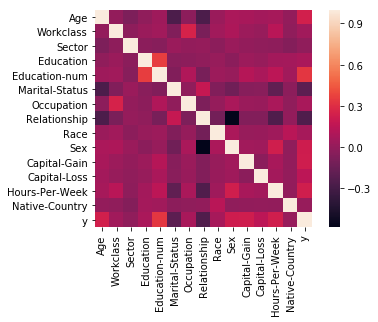

In [25]:
# Encode the categorical features as numbers
# This code was used to represent data into correlation matrix
# taken from https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()